In [10]:
import pandas as pd 
from pathlib import Path 

In [11]:
# Reading train, validation and test data
BASE_PATH = Path('../data')

TRAIN_SEQUENCE_PATH = BASE_PATH.joinpath('train_sequences.csv')
VAL_SEQUENCE_PATH = BASE_PATH.joinpath('validation_sequences.csv')
TEST_SEQUENCE_PATH = BASE_PATH.joinpath('test_sequences.csv')

train_sequence_df = pd.read_csv(TRAIN_SEQUENCE_PATH)
val_sequence_df   = pd.read_csv(VAL_SEQUENCE_PATH)
test_sequence_df  = pd.read_csv(TEST_SEQUENCE_PATH)

In [12]:
train_sequence_df.head()

,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."


In [13]:
print(f"Train sequences has size: {train_sequence_df.shape}")
print(f"Validation sequences has size: {val_sequence_df.shape}")
print(f"Test sequences has size: {test_sequence_df.shape}")

Train sequences has size: (844, 5)
Validation sequences has size: (12, 5)
Test sequences has size: (12, 5)


In [14]:
# Check for missing values

for df in [train_sequence_df, val_sequence_df, test_sequence_df]:
    print("Missing values for training sequence dataset:")
    print(df.isna().sum())

Missing values for training sequence dataset:
target_id          0
sequence           0
temporal_cutoff    0
description        0
all_sequences      5
dtype: int64
Missing values for training sequence dataset:
target_id          0
sequence           0
temporal_cutoff    0
description        0
all_sequences      0
dtype: int64
Missing values for training sequence dataset:
target_id          0
sequence           0
temporal_cutoff    0
description        0
all_sequences      0
dtype: int64


We can see that the training sequence has 5 missing "all_sequence".
For the other datasets, there are no missing values

In [15]:
# Now, let's look at the `sequence` column
train_sequence_len = train_sequence_df['sequence'].apply(len)

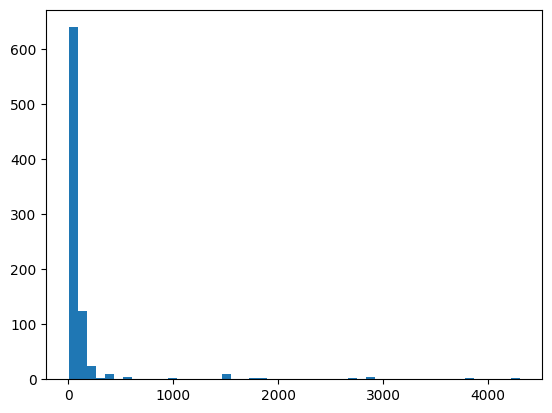

In [16]:
import matplotlib.pyplot as plt
plt.hist(train_sequence_len, bins = 50)
plt.show()


In [17]:
# According to the description:
# sequence - (string) The RNA sequence. For test_sequences.csv, this is guaranteed to be a string of A, C, G, and U. For some train_sequences.csv, other characters may appear.

# We can check if there are any other characters in the `sequence` column in the training set

# Count sequences with letters other than A,C,G,U
non_standard = train_sequence_df['sequence'].apply(lambda x: len(set(x) - set('ACGU')))
print(f"Number of sequences with non-standard letters: {(non_standard > 0).sum()}")
# Print sequences with non-standard letters
non_standard_seqs = train_sequence_df[non_standard > 0]
print("\nSequences containing non-standard letters:")
for idx, row in non_standard_seqs.iterrows():
    print(f"\nSequence {idx}:")
    print(f"Target ID: {row['target_id']}")
    print(f"Sequence: {row['sequence']}")
    print(f"Non-standard letters: {set(row['sequence']) - set('ACGU')}")


# We observe that some entries have `-` and `X` - maybe they are placeholders or missing values?

Number of sequences with non-standard letters: 4

Sequences containing non-standard letters:

Sequence 610:
Target ID: 6WB1_C
Sequence: GACUCUGGUAACUAGAGAUCCCUCAGACCCUUUUAGUCAGUGUGGAAAAUCU--CUAGCAGUGGCGCCCGAACAGGGACUUGAAAGCGAAAGUAAAGCCAGAG
Non-standard letters: {'-'}

Sequence 639:
Target ID: 6Y0C_IN1
Sequence: AGUAGAAACAAGGG--UAUUUUUCUUUACUAGUCUACCCUGCUUUUGCU
Non-standard letters: {'-'}

Sequence 687:
Target ID: 7SLP_R
Sequence: XGAUGUGAGGGCGACUUCGGUCCUCCCUCACCGCUCCAUGUGCGAAAUGAGGCGCUGCAUGUGGCAGUCUGCCUUUCUUUU
Non-standard letters: {'X'}

Sequence 782:
Target ID: 8H6E_4A
Sequence: XAGCUUUGCGCAGUGGCAGUAUCGUAGCCAAUGAGGUCUAUCCGAGGCGCGAUUAUUGCUAAUUGAAAACUUUUCCCAAUACCCCGCCGUGACGACUUGCAAUAUAGUCGGCACUGGCAAUUUUUGACAGUCUCUACGGAGACUGG
Non-standard letters: {'X'}


Most of the sequences are quite short, but there are some outliers with very long sequences.

In [18]:
# Now, let's study the `target_id`. This variable corresponds to the identifier of the Protein Data Bank https://www.rcsb.org/

# The format of this variable is PDB_ID_CHAIN_ID, where PDB_ID is the identifier of the protein in the Data Bank, CHAIN_ID is the identifier of the monomer in the pdb file.

# for example, the target_id of the first row is 1SCL_A. We can view this protein here: https://www.rcsb.org/structure/1SCL


# How many unique target_ids are there?
pdb_ids = train_sequence_df['target_id'].str.split('_').str[0]
chain_ids = train_sequence_df['target_id'].str.split('_').str[1]

print(f"Number of unique PDB IDs: {len(pdb_ids.unique())}")
print(f"Number of unique chain IDs: {len(chain_ids.unique())}")


pdb_id_counts = pdb_ids.value_counts()
chain_id_counts = chain_ids.value_counts()

print(f"Top 10 PDB IDs: {pdb_id_counts.head(10)}")
print(f"Top 10 chain IDs: {chain_id_counts.head(10)}")


Number of unique PDB IDs: 735
Number of unique chain IDs: 99
Top 10 PDB IDs: target_id
4V5Z    11
2OM7     7
1ZC8     6
2R1G     6
4V7E     5
4V6X     5
3DEG     5
4V6W     5
6ZVK     5
5MC6     4
Name: count, dtype: int64
Top 10 chain IDs: target_id
A    381
B    117
C     48
D     36
R     22
E     17
F     14
H     11
S     11
V      9
Name: count, dtype: int64


In [19]:
# TODO: explore `description`, `all_sequences`